# NN With Only Math and Numpy

## Getting Data

In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle.

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gabrielmurilo","key":"11aface1fe2d2ea84be0f78b1f8fb44f"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                        title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
prasad22/vehicle-population-statistics                     Vehicle Population Statistics                       44KB  2024-05-25 03:31:34            725         24  1.0              
rohit265/credit-card-eligibility-data-determining-factors  Credit Card Eligibility Data: Determining Factors  296KB  2024-05-18 11:31:28            948         23  1.0              
rahulvyasm/netflix-movies-and-tv-shows                     Netflix Movies and TV Shows                          1MB  2024-04-10 09:48:38          25670        549  1.0              
mayankanand2701/netflix-stock-price-dataset                Netflix Stock Price Dataset 🎥🍿🎬

In [10]:
!kaggle competitions download -c digit-recognizer

 33% 5.00M/15.3M [00:00<00:00, 40.4MB/s]
100% 15.3M/15.3M [00:00<00:00, 74.4MB/s]


In [11]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Pre-processing Data

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [13]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

## NN parameters

In [16]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [17]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

## Train

In [18]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 1 6 ... 1 5 3] [4 0 6 ... 5 1 0]
0.055682926829268294
Iteration:  10
[3 0 5 ... 8 5 3] [4 0 6 ... 5 1 0]
0.1787560975609756
Iteration:  20
[3 0 1 ... 8 1 0] [4 0 6 ... 5 1 0]
0.2724390243902439
Iteration:  30
[3 0 1 ... 8 1 0] [4 0 6 ... 5 1 0]
0.3308048780487805
Iteration:  40
[3 0 1 ... 8 1 0] [4 0 6 ... 5 1 0]
0.3784878048780488
Iteration:  50
[3 0 2 ... 8 1 0] [4 0 6 ... 5 1 0]
0.41973170731707315
Iteration:  60
[3 0 2 ... 8 1 0] [4 0 6 ... 5 1 0]
0.46302439024390246
Iteration:  70
[3 0 2 ... 8 1 0] [4 0 6 ... 5 1 0]
0.5083414634146342
Iteration:  80
[7 0 2 ... 8 1 0] [4 0 6 ... 5 1 0]
0.5499756097560976
Iteration:  90
[4 0 2 ... 8 1 0] [4 0 6 ... 5 1 0]
0.586
Iteration:  100
[4 0 2 ... 8 1 0] [4 0 6 ... 5 1 0]
0.6150731707317073
Iteration:  110
[4 0 2 ... 8 1 0] [4 0 6 ... 5 1 0]
0.6396585365853659
Iteration:  120
[4 0 2 ... 8 1 0] [4 0 6 ... 5 1 0]
0.6592682926829269
Iteration:  130
[4 0 2 ... 8 1 0] [4 0 6 ... 5 1 0]
0.6747804878048781
Iteration:  140
[4 0 2 ...

## Validation

In [37]:
def make_predictions(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    print(Z1.shape, A1.shape, Z2.shape, A2.shape)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

(10, 1) (10, 1) (10, 1) (10, 1)
Prediction:  [0]
Label:  0


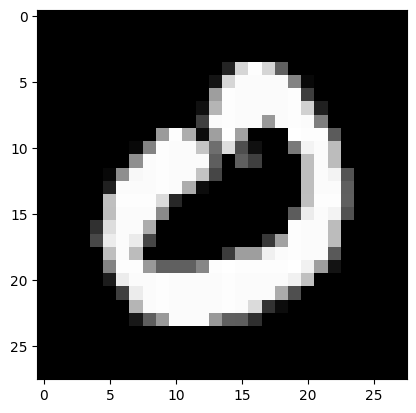

In [38]:
test_prediction(1, W1, b1, W2, b2)


In [21]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 3 1 4 7 3 1 6 9 6 7 6 2 8 2 4 5 9 2 5 5 6 3 5 8 3 9 4 5 7 4 0 8 3 6 7 6
 3 3 8 6 9 9 0 4 2 6 3 0 8 7 8 6 0 9 6 0 4 0 3 7 7 5 2 7 5 0 0 7 9 6 1 3 1
 0 4 3 4 4 0 5 8 1 1 1 9 1 5 3 9 7 6 0 7 0 2 5 4 9 5 8 4 0 7 5 7 7 1 8 2 6
 8 8 1 0 3 7 8 2 6 5 4 9 6 1 4 6 9 7 0 0 2 2 4 8 2 5 1 4 4 7 0 7 0 7 4 3 4
 6 1 0 4 7 2 4 1 5 2 9 2 9 9 3 5 0 5 4 2 7 2 1 8 1 4 1 5 0 1 0 3 7 6 0 6 4
 9 2 7 2 4 2 4 9 4 0 1 7 1 0 8 4 9 0 9 7 0 3 2 8 6 6 4 8 7 4 1 8 4 7 4 6 4
 3 7 0 5 1 9 8 8 2 6 0 6 8 0 7 5 1 2 5 8 8 4 9 7 2 1 3 6 8 5 1 2 4 3 6 3 2
 5 8 2 4 9 1 7 4 5 7 9 9 3 6 2 6 1 9 0 1 2 9 0 3 1 6 4 4 5 3 1 6 7 5 3 4 4
 9 0 7 4 7 0 7 8 1 6 5 5 4 3 0 8 6 4 2 7 1 3 4 9 5 4 7 2 2 2 1 4 5 9 2 8 7
 9 0 5 7 1 3 4 1 6 8 2 2 4 8 0 3 9 7 0 8 6 2 2 5 9 1 2 6 6 4 4 9 9 4 1 9 4
 7 3 8 5 4 2 0 3 8 6 7 8 3 8 3 1 7 7 8 9 6 5 6 9 7 1 0 7 4 4 2 6 5 6 3 5 7
 0 7 4 5 0 3 1 1 6 1 5 1 8 6 3 9 2 3 9 7 8 9 3 3 5 9 7 0 8 2 6 9 8 1 7 9 3
 7 6 0 5 5 1 2 2 7 6 9 7 0 3 9 7 0 3 1 3 9 7 6 2 3 1 1 8 9 4 5 0 6 9 1 0 4
 7 9 8 6 6 4 9 0 8 3 2 4 

0.834